# VO9 Simulated Annealing

In [1]:
import os

import numpy as np
import pandas as pd
import random
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

from tqdm import tqdm_notebook as tqdm

## Extract Input Image

In [2]:
input_data_folder = "input_data"
df = pd.read_csv(os.path.join(input_data_folder, "SimMRimage.dat"), header=None)
len(df)

84582

In [3]:
i_max = max(df[0].apply(lambda x: int(x[:5])))
j_max = max(df[0].apply(lambda x: int(x[5:10])))
print("i_max: %i, j_max: %i" % (i_max, j_max))
assert len(df) == i_max*j_max

i_max: 254, j_max: 333


2000 0


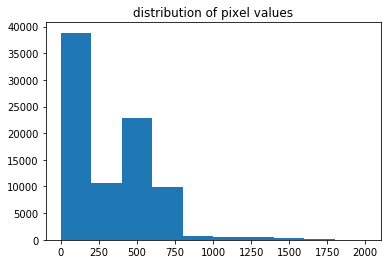

In [4]:
pixel = df[0].apply(lambda x: int(x[10:])).values
print(max(pixel), min(pixel))
plt.title("distribution of pixel values")
plt.hist(pixel)
plt.show()
plt.close()

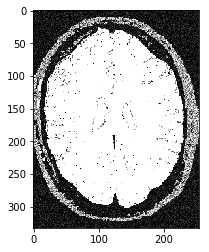

In [5]:
img = np.zeros(shape=(i_max, j_max))
for i in range(i_max):
    for j in range(j_max):
        img[i,j] = int(pixel[i*j_max+j])

img = np.transpose(img)
img_obj = Image.fromarray(img)
imshow(img_obj);

## Simulated Annealing

In [6]:
# img = img[::3, ::3]

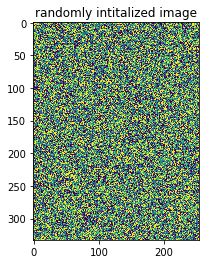

planned iterations: 87


itr: 0, t: 1500.000000


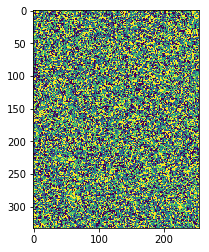

itr: 1, t: 1428.571429
itr: 2, t: 1360.544218
itr: 3, t: 1295.756398
itr: 4, t: 1234.053712
itr: 5, t: 1175.289250
itr: 6, t: 1119.323095
itr: 7, t: 1066.021995
itr: 8, t: 1015.259043
itr: 9, t: 966.913374
itr: 10, t: 920.869880


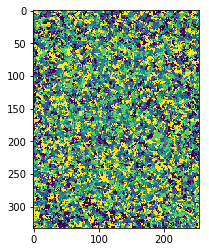

itr: 11, t: 877.018934
itr: 12, t: 835.256127
itr: 13, t: 795.482026
itr: 14, t: 757.601929
itr: 15, t: 721.525647
itr: 16, t: 687.167283
itr: 17, t: 654.445031
itr: 18, t: 623.280982
itr: 19, t: 593.600936
itr: 20, t: 565.334224


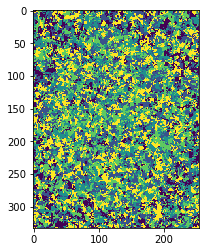

itr: 21, t: 538.413547
itr: 22, t: 512.774807
itr: 23, t: 488.356959
itr: 24, t: 465.101865
itr: 25, t: 442.954158
itr: 26, t: 421.861102
itr: 27, t: 401.772479
itr: 28, t: 382.640456
itr: 29, t: 364.419482
itr: 30, t: 347.066173


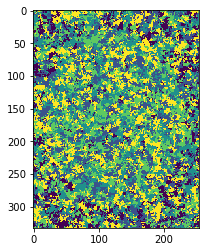

itr: 31, t: 330.539212
itr: 32, t: 314.799250
itr: 33, t: 299.808809
itr: 34, t: 285.532199
itr: 35, t: 271.935428
itr: 36, t: 258.986122
itr: 37, t: 246.653449
itr: 38, t: 234.908047
itr: 39, t: 223.721950
itr: 40, t: 213.068523


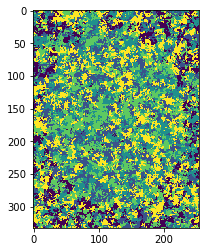

itr: 41, t: 202.922403
itr: 42, t: 193.259432
itr: 43, t: 184.056602
itr: 44, t: 175.292002
itr: 45, t: 166.944763
itr: 46, t: 158.995013
itr: 47, t: 151.423822
itr: 48, t: 144.213163
itr: 49, t: 137.345870
itr: 50, t: 130.805590


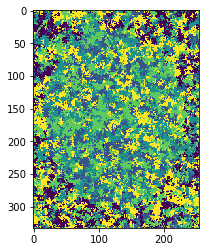

itr: 51, t: 124.576753
itr: 52, t: 118.644526
itr: 53, t: 112.994787
itr: 54, t: 107.614083
itr: 55, t: 102.489603
itr: 56, t: 97.609146
itr: 57, t: 92.961091
itr: 58, t: 88.534372
itr: 59, t: 84.318450
itr: 60, t: 80.303286


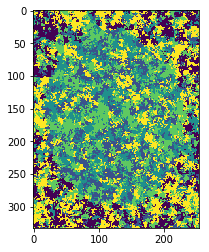

itr: 61, t: 76.479320
itr: 62, t: 72.837447
itr: 63, t: 69.368997
itr: 64, t: 66.065712
itr: 65, t: 62.919726
itr: 66, t: 59.923548
itr: 67, t: 57.070046
itr: 68, t: 54.352425
itr: 69, t: 51.764214
itr: 70, t: 49.299251


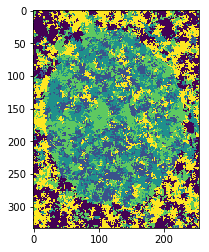

itr: 71, t: 46.951668
itr: 72, t: 44.715874
itr: 73, t: 42.586547
itr: 74, t: 40.558616
itr: 75, t: 38.627253
itr: 76, t: 36.787860
itr: 77, t: 35.036058
itr: 78, t: 33.367674
itr: 79, t: 31.778737
itr: 80, t: 30.265464


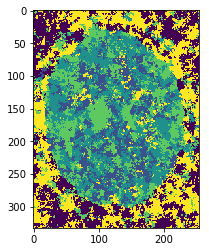

itr: 81, t: 28.824251
itr: 82, t: 27.451668
itr: 83, t: 26.144446
itr: 84, t: 24.899472
itr: 85, t: 23.713783
itr: 86, t: 22.584555



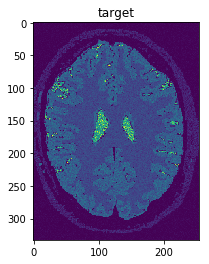

In [11]:
MW = [30,426,602,1223,167]
SIGMA = [30,59,102,307,69]

start_t = 1500
end_t = 22
lambd = 1.05

# x = np.random.random(size=img.shape)*max(pixel)
# x = x.astype(np.int)
# np.max(x), np.min(x)
x = np.random.choice([i for i in range(5)], size=img.shape)
plt.title("randomly intitalized image")
plt.imshow(x)
plt.show()
plt.close()

J = -1
neighbors = [(1,0), (-1,0), (0,1), (0,-1)]

def calc_energy(x, img, x_new, img_new, i, j, i_max, j_max, neighbors, J, SIGMA, MW): 
    dE = 0
    for neigh in neighbors:
        if(x[(i+neigh[0])%i_max, (j+neigh[1])%j_max] == x_new):
            dE -= J
        if(x[(i+neigh[0])%i_max, (j+neigh[1])%j_max] == x[i,j]):
            dE += J
    dE += (img_new - MW[x_new])**2/(2*SIGMA[x_new]**2) + np.log(SIGMA[x_new])
    dE -= (img[i,j] - MW[x[i,j]])**2/(2*SIGMA[x[i,j]]**2) + np.log(SIGMA[x[i,j]])
    return dE

def sweep(x, neighbors, t, J, SIGMA, MW):
    i_max = x.shape[0]
    j_max = x.shape[1]

    for _ in range(x.size):
#     for _ in range(3):
        neigh_i, neigh_j = random.choice(neighbors)
        i = random.randint(0, i_max-1)
        j = random.randint(0, j_max-1)

        x_new = x[(i+neigh_i)%i_max, (j+neigh_j)%j_max]
        img_new = img[(i+neigh_i)%i_max, (j+neigh_j)%j_max]
        
        dE = calc_energy(x, img, x_new, img_new, i, j, i_max, j_max, neighbors, J, SIGMA, MW)
        
        if(dE/t > 20):
            r = 0
        elif(dE/t < 0.05):
            r = 1
        else:
            r = np.exp(-dE/t)
        
        if(random.random() < min(1, r)):
            x[i,j] = x_new

    return x

t_test = start_t
itr = 0
while(t_test > end_t):
    t_test /= lambd
    itr += 1
print("planned iterations: %i" % itr)

t = start_t
for k in tqdm(range(itr)):
    print("itr: %i, t: %f" % (k, t))
    
    x = sweep(x, neighbors, t, J, SIGMA, MW)
    if(k%10==0):
        plt.imshow(x)
        plt.show()
        plt.close()

    t /= lambd
    
    
plt.title("target")
plt.imshow(img)
plt.show()
plt.close()